In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai import *
import scipy.io
import numpy as np
import os
import cv2 as cv
import shutil
import random

In [3]:
img_width, img_height = 224, 224

In [4]:
os.path.exists('data/cars_train')

True

In [5]:
data = ImageDataBunch.from_folder('data/','train','valid',ds_tfms=get_transforms(do_flip=False, flip_vert=True, max_rotate=5.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75),size=224,bs=32).normalize(imagenet_stats)

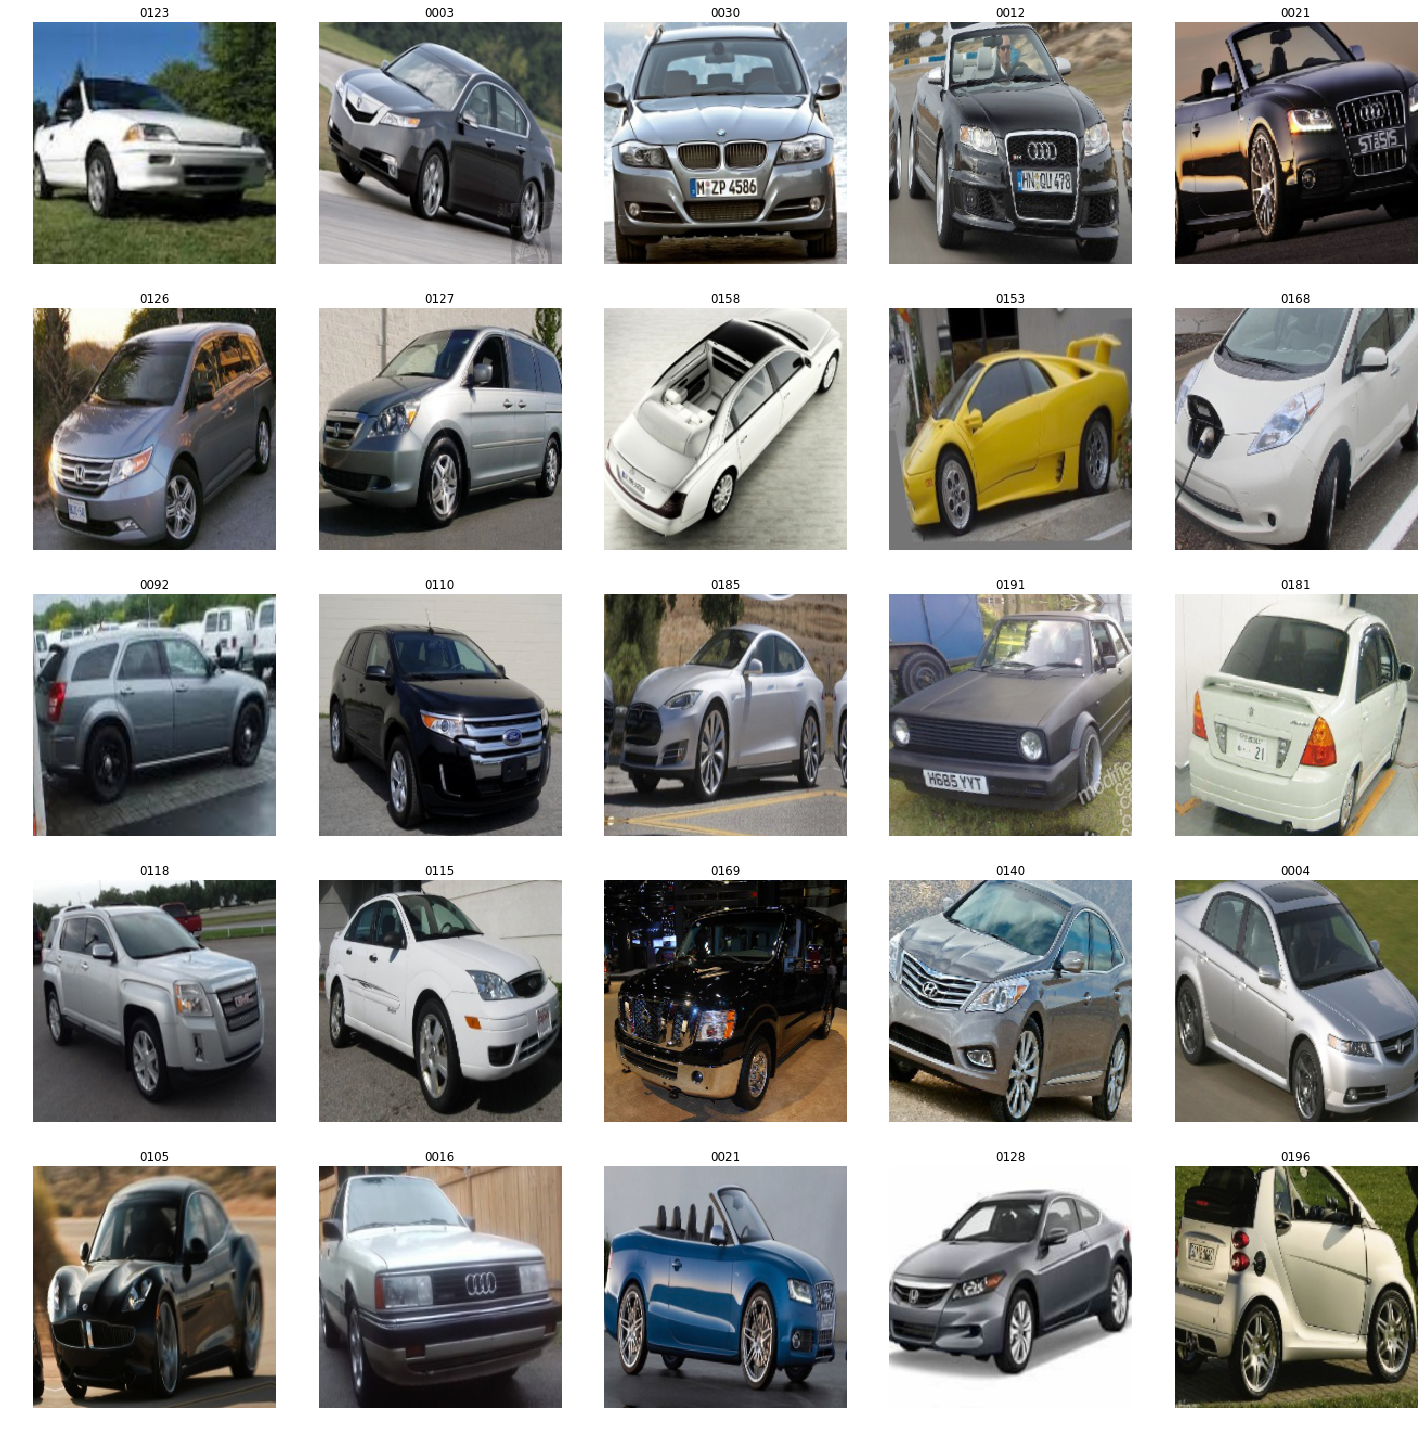

In [6]:
data.show_batch()

In [6]:
# class names and number of classes
len(data.classes), data.c

(196, 196)

In [7]:
learn = cnn_learner(data, models.resnet101, metrics=accuracy)

In [9]:
learn.fit_one_cycle(4)

In [10]:
preds,y, loss = learn.get_preds(with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0}.'.format(acc))

The accuracy is 0.6654388904571533.


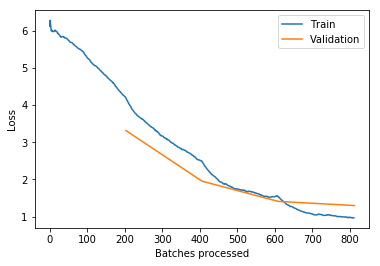

In [11]:
learn.recorder.plot_losses()

In [12]:
learn.save('cv-cars-resnet101-1')

In [13]:
# RESULTS
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

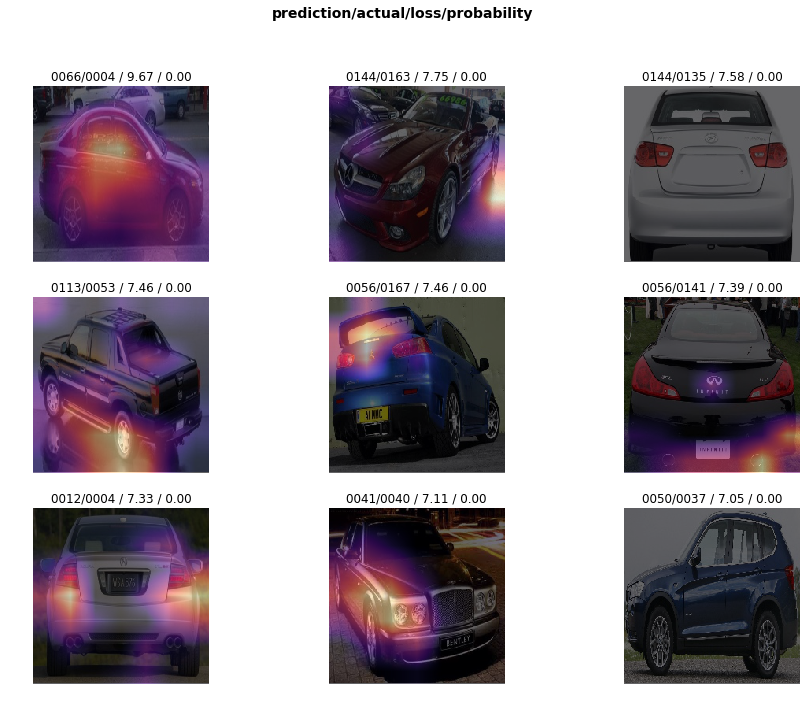

In [14]:
interp.plot_top_losses(9, figsize=(15,11))

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


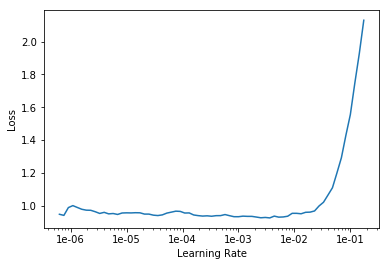

In [16]:
learn.recorder.plot()

In [17]:
learn.unfreeze()
learn.fit_one_cycle(16, max_lr=slice(1e-5,1e-3))

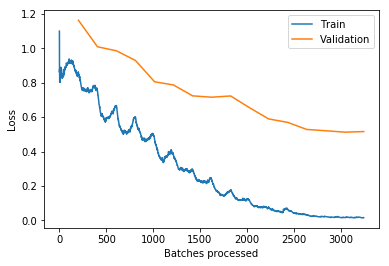

In [18]:
learn.recorder.plot_losses()

In [19]:
learn.save('cv-cars-resnet101-2')

## Classification on Test Set

In [15]:
labels = scipy.io.loadmat('//home//jupyter//ai-for-sea//data//cars_test_annos_withlabels.mat')

In [9]:
load_learner??

In [10]:
learn.load('cv-cars-resnet101-2')

Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64,

In [12]:
learn = load_learner('/home/jupyter/ai-for-sea/data/', file='export-rn101.pkl', test= ImageList.from_csv('//home//jupyter//ai-for-sea//data//','test_labels.csv',folder='//test'))
preds,y = learn.TTA(ds_type=DatasetType.Test)

In [13]:
a=preds;a.shape

torch.Size([8041, 196])

In [16]:
b=np.array(labels['annotations']['class'],dtype=np.int)-1;b.shape #labels in range [0..195]
b = torch.from_numpy(b)

In [17]:
acc=accuracy(a,b);acc

tensor(0.8924)

## Some more experimentation

In [9]:
learn.load('cv-cars-resnet101-1')

Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64,

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


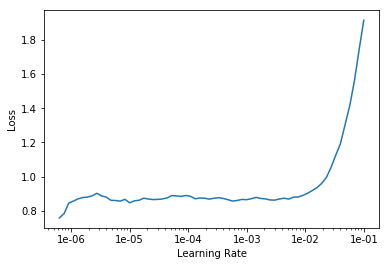

In [11]:
learn.recorder.plot()

In [12]:
lr = 1e-3
div_lr = 10
lrs = np.array([lr/(div_lr**2), lr/div_lr, lr])
lrs

array([1.e-05, 1.e-04, 1.e-03])

In [13]:
learn.unfreeze()
learn.fit_one_cycle(cyc_len=16, max_lr=lrs)

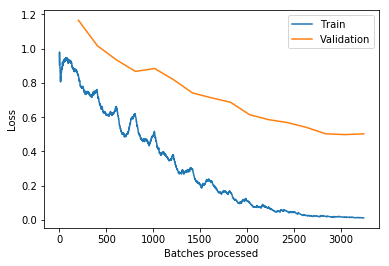

In [14]:
learn.recorder.plot_losses()

In [15]:
learn.save('cv-cars-resnet101-3')

## Stage - 4

In [9]:
learn.load('cv-cars-resnet101-3')

Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64,

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


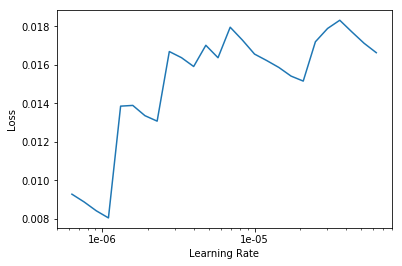

In [11]:
learn.recorder.plot()

In [12]:
learn.unfreeze()
learn.fit_one_cycle(20, max_lr=slice(7e-6,2e-5))

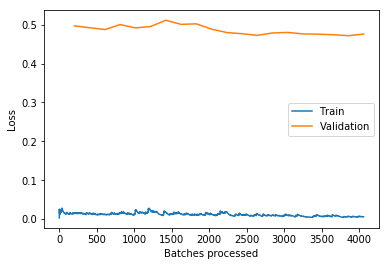

In [14]:
learn.recorder.plot_losses()

## Different batch size

In [9]:
learn.data.batch_size

32

In [10]:
learn.load('cv-cars-resnet101-1')

Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64,

In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


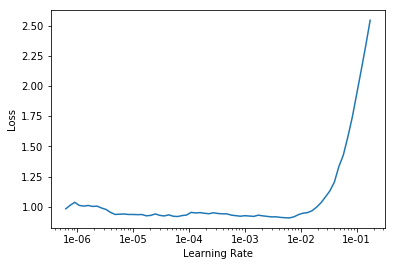

In [12]:
learn.recorder.plot()

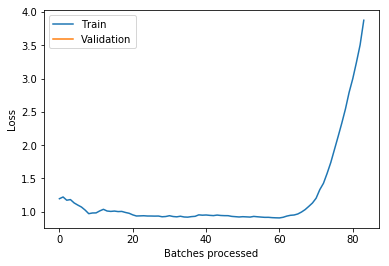

In [13]:
learn.recorder.plot_losses()

In [14]:
lr = 1e-3
div_lr = 10
lrs = np.array([lr/(div_lr**2), lr/div_lr, lr])
lrs

array([1.e-05, 1.e-04, 1.e-03])

In [15]:
learn.unfreeze()
learn.fit_one_cycle(cyc_len=36, max_lr=lrs, wd=0.0005)

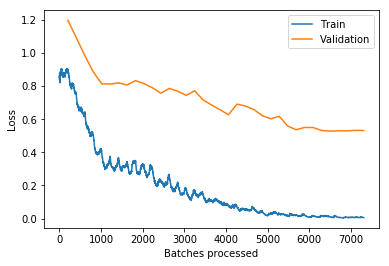

In [16]:
learn.recorder.plot_losses()

In [17]:
learn.save('cv-cars-resnet101-dlr-40e')

In [18]:
learn.export('/home/jupyter/ai-for-sea/data/export-rn101-dlr-40e.pkl')

In [8]:
learn.load('cv-cars-resnet101-dlr-40e')

Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64,

In [9]:
learn.summary

<bound method model_summary of Learner(data=ImageDataBunch;

Train: LabelList (6515 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Valid: LabelList (1629 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
0116,0116,0116,0116,0116
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tr

In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


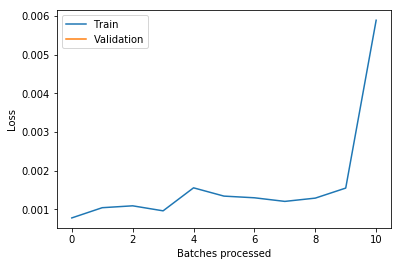

In [12]:
learn.recorder.plot_losses()

In [13]:
learn.unfreeze()
learn.fit_one_cycle(20)

KeyboardInterrupt: 

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


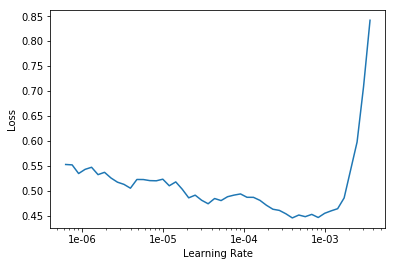

In [15]:
learn.recorder.plot()

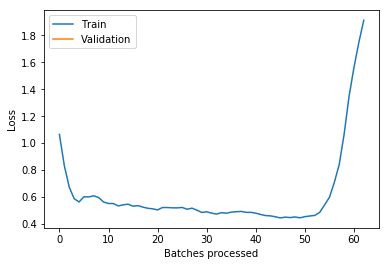

In [16]:
learn.recorder.plot_losses()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(20, max_lr=slice(1e-4,5e-4))

In [19]:
learn.save('cv-cars-resnet101-dlr-60e')

In [20]:
learn.export('/home/jupyter/ai-for-sea/data/export-rn101-dlr-60e.pkl')

In [21]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


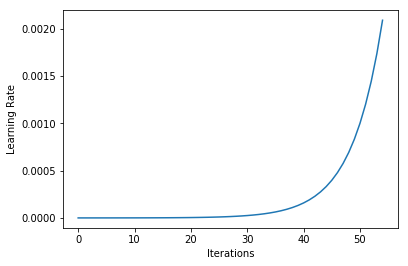

In [22]:
learn.recorder.plot_lr()

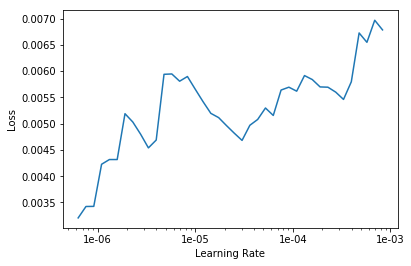

In [23]:
learn.recorder.plot()

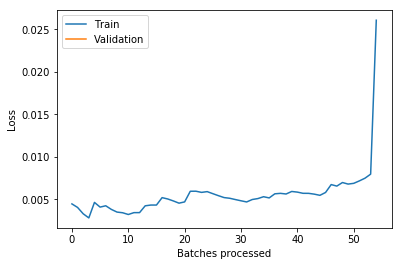

In [24]:
learn.recorder.plot_losses()

In [1]:
get_acc(learn)

NameError: name 'get_acc' is not defined